# 분류용 선형모델
선형모델은 분류에서도 널리 사용함

분류용 선형 모델에서는 결정경계가 입력의 선형함수

선형모델학습의 알고리즘은 두가지 방법으로 구분가능
- 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
- 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
알고리즘은 훈련세트를 잘 학습하는지 측정하는 방법이 다 다름

가장 널리 알려진 선형분류 알고리즘은 로지스틱 회귀(logistic regression)와 서포트 벡터 머신(SVC: support vector machine)

forge데이터셋으로 LogisticRegression과 LinearSVC모델을 만들고 결정경계를 그림으로 나타냄.

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
import sys
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from scipy import sparse
from sklearn.model_selection import train_test_split

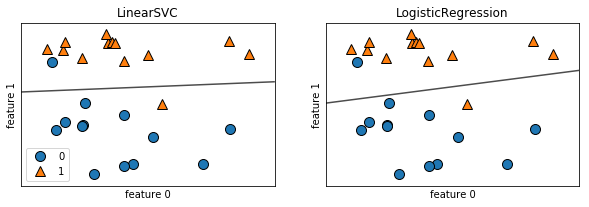

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

첫번째 특성을 x축에, 두번째 특성을 y축에다가 놓고있음
LinearSvc와 LogisticRegression으로 만든 결정 경계가 직선으로 표현, 위쪽은 클래스1, 아래쪽은 클래스0으로 나눔
즉 새로운데이터가 직선 위에 놓이면 클래스 1로 분류되고, 직선 아래에 놓이면 클래스 0로 분류됨

이 두 모델은 비슷한 결정경계를 만들고 똑같이 두 포인트를 잘못 분류함. Ridge와 마찬가지로 L2 규제를 사용함

LogisticRegression과 LinearSVC에서는 규제의 강로를 결정하는 매개변수는 C임. C의 값이 높아지면 규제가 감소함
즉 높은 C값을 설정하면 LogisticRegression과 LinearSVC는 훈련세트에 맞추려고 하고, 
낮은 C값을 지정하면 모델은 계수벡터(w)가 0에 가까워지게 만듦

매개변수 C의 작동방식을 다르게 설명가능. 알고리즘은 C의 값이 낮아지면 데이터 포인터 중 다수에 맞추려 하고
C값을 높이면 개개의 데이터 포인트를 정확히 분류하려고함
LinearSVC의 예임

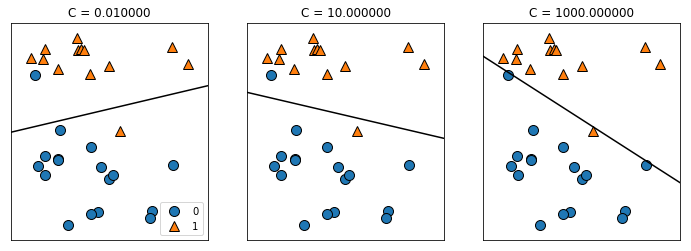

In [12]:
mglearn.plots.plot_linear_svc_regularization()

왼쪽 그림은 아주 작은 C값으로 규제가 많이 적용됨. 클래스 0의 대부분은 아래에 있고 클래스 1의 대부분은 위에 있음
규제가 강해진 모델은 수평에 가까군 결정경계를 만들고 잘못 불류한 데이터 포인트는 두개임
오른쪽 그림에서는 C값을 아주 크게 했더니 결정경계는 크게 기울어졌고, 클래스 0의 모든 데이터를 올바르게 분류함
모든 포인트를 직선으로는 완벽히 분류할 수 없어 클래스 1의 포인트 하나는 여전히 잘못 분류됨. 
오른쪽 그림은 모든 포인트를 정확하게 분류하려고 했지만 전체적 배치 파악 x => 과대적합한 모델

고차원 분류에서는 선형 모델이 매우 강력해지고 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요

유방암 데이터셋을 사용해 LogisticRegression을 좀 더 자세히 살펴봄

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg= LogisticRegression().fit(X_train, y_train)
print('훈련세트 점수 : {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트세트 점수 : {:.3f}'.format(logreg.score(X_test, y_test)))

훈련세트 점수 : 0.955
테스트세트 점수 : 0.958


기본값이 C=1이 훈련세트와 테스트 세트 모두에서 95%정확도로 훌륭한 성능을 내고 있음

하지만 훈련세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같음
모델의 제약을 풀어주기 위해 C를 증가시킴

In [20]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련세트 점수 : {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트세트 점수 : {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련세트 점수 : 0.972
테스트세트 점수 : 0.965


C=100을 사용하니 훈련세트의 정확도가 높어졌고 테스트 세트의 정확도도 조금 올라감. 
이는 복잡도가 높은 모델일 수록 성능이 좋은 것을 보여줌

이번엔 규제를 강하게 하기 위해 C=0.01을 사용함

In [21]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련세트 점수 : {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트세트 점수 : {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련세트 점수 : 0.934
테스트세트 점수 : 0.930


In [ ]:
과소적합인 모델이므로 훈련세트의 정확도는 기본 매개변수보다 낮아짐

규제 매개변수 C 설정을 세가지로 다르게 하여 학습시킨 모델의 계수를 확인

Text(0,0.5,'Coefficient magnitude')

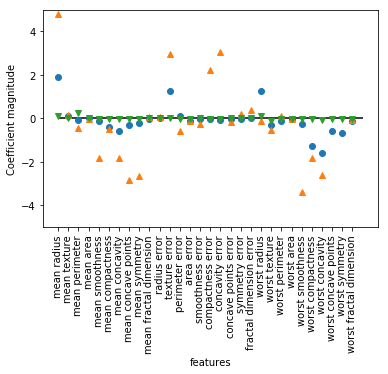

In [46]:
plt.plot(logreg.coef_.T, 'o', label='c=1')
plt.plot(logreg100.coef_.T, '^', label='c=100')
plt.plot(logreg001.coef_.T, 'v', label='c=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('features')
plt.ylabel('Coefficient magnitude')

좀 더 이해하기 쉬운 모델은 L1 규제(비록 특성은 조금만 쓰겠지만)를 사용하는 것이 좋음. 
다음은 L1 규제를 사용할 때의 정확도와 계수그래프

C=0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.913
C=0.001인 l1 로지스틱 회귀의 테스트 정확도 : 0.923
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.960
C=1.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.958
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.986
C=100.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.979


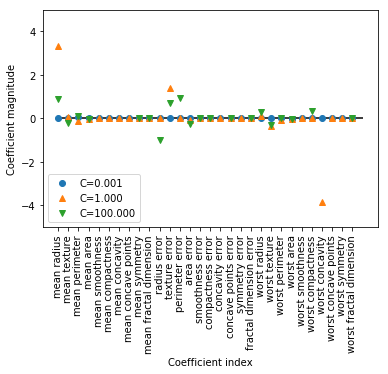

In [53]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
                   lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
                   print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.3f}".format(C, lr_l1.score(X_train, y_train)))
                   print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도 : {:.3f}".format(C, lr_l1.score(X_test, y_test)))
                   plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))   
                
             
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

이진분류에서의 선형모델과 회귀에서의  선형모델 사이에는 유사점이 많음. 
회귀에서처럼, 모델의 주요 차이는 모든 특성을 사용할 지 일부 특성을 사용할 지를 결정하는 penalty 매개변수임

# 다중 클래스 분류용 선형모델
(로지스틱 회귀만 제외하고)많은 선형분류 모델은 태생저긍로 이진분류만 지원
즉 다중 클래스를 지원하지 않음. 이진분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보변적인 기법은 일대다(one-vs -rest)방법
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
결국 클래스의 수만큼 이진 분류 모델이 만들어짐
예측을 할 때 이렇게 만드렁진 모든 이진 분류가 작동해 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

클래스별 이진분류기를 만들면 각 클래스가 계수 벡터(w)와 절편(b)를 하나씩 가짐

세 개의 클래스를 가진 간단한 데이터 셋에 일대다 방식 적용. 이 데이터셋은 2차원, 각 클래스는 정규분포를 따름

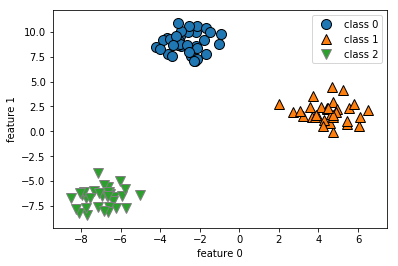

In [57]:
from sklearn.datasets import make_blobs

X, y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

이 데이터셋으로 LinearSVC분류기를 훈련해봄

In [66]:
linear_svm=LinearSVC().fit(X,y)
print('계수 배열의 크기 :', linear_svm.coef_.shape)
print('절편 배열의 크기 : ', linear_svm.intercept_.shape)

계수 배열의 크기 : (3, 2)
절편 배열의 크기 :  (3,)


coef_배열의 크기는 (3,2)이다.  coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며,
열은 각 특성에 따른 계수 값(이 데이터셋에는 두 개)을 가지고 있음.
intercept_는 각 클래스의 절편을 담은 1차원 벡터

세 개의 이진분류기가 만드는 경계를 시각화

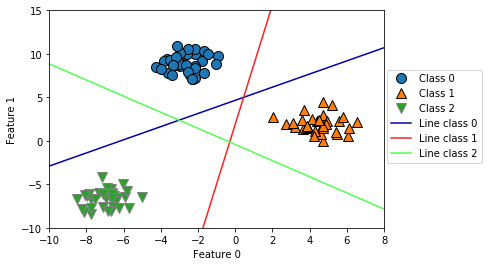

In [71]:
mglearn.discrete_scatter(X[:, 0], X[: ,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
   plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

훈련데이터의 클래스 0에 속한 모든 포인트는 클래스 0을 구분하는 직선위에, 이진분류기가 만들어진 클래스 0지역에 있음
but, 클래스 0에 속한 포인트는 클래스 2를 구분하는 직선 위, 즉 클래스 2의 이진분류기에 의해 나머지로 분류됨
또한 클래스 0에 속한 포인트는 클래스 1을 구분하는 직선 왼쪽, 즉 클래스 1의 이진분류기에 의해 나머지로 분류

하지만 그림 중앙의 삼각형 영역은 모두가 나머지로 분류 
=> 분류공식의 결과가 가장 높은 클래스로 분류됨

[-0.17492191  0.23140373]
[ 0.47621796 -0.06937106]
[-0.18913892 -0.20400598]


Text(0,0.5,'Feature 1')

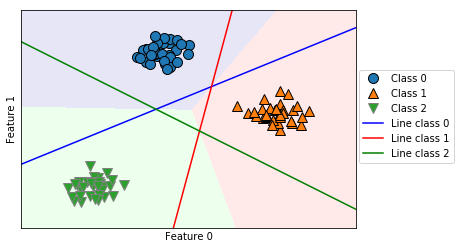

In [80]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.1)
mglearn.discrete_scatter(X[: ,0], X[: ,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

매개변수
중요한 특성이 많지 x -> l1규제
기본적으로는 L2규제
장점
학습속도가 빠르고 예측이 빠름
수십만~수백만개의 대용량 데이터셋이면 LogisticRegression과 Ridge에 solver='sag' 옵션을 줌
예측이 어떻게 되는지 쉽게 이해 가능
샘플에 비해 특성이 많을 때 잘 작동
단점
저차원의 데이터셋에서는 실패